In [81]:
!pip install ta

Loading the libraries

In [41]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
from ta.volatility import AverageTrueRange
from joblib import load
from joblib import dump
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

Loading the dataset

In [42]:
df_original=pd.read_csv('btc_1h.csv')
df_original

datetime      open      high       low     close  \
0      2018-01-01 05:30:00  13715.65  13715.65  13400.01  13529.01   
1      2018-01-01 06:30:00  13528.99  13595.89  13155.38  13203.06   
2      2018-01-01 07:30:00  13203.00  13418.43  13200.00  13330.18   
3      2018-01-01 08:30:00  13330.26  13611.27  13290.00  13410.03   
4      2018-01-01 09:30:00  13434.98  13623.29  13322.15  13601.01   
...                    ...       ...       ...       ...       ...   
35659  2022-01-31 01:30:00  37512.37  37740.00  37351.63  37684.45   
35660  2022-01-31 02:30:00  37684.45  37762.60  37492.25  37729.00   
35661  2022-01-31 03:30:00  37729.00  37855.54  37625.41  37785.78   
35662  2022-01-31 04:30:00  37785.78  38230.00  37778.46  37881.76   
35663  2022-01-31 05:30:00  37881.75  37951.07  36828.32  36829.30   

            volume  
0       443.356199  
1       383.697006  
2       429.064572  
3       420.087030  
4       340.807329  
...            ...  
35659  1037.922560  
35660   874.060520  
35661   734.658550  
35662  1728.811800  
35663  2907.710960  

[35664 rows x 6 columns]

In [43]:
df_to_train = df_original.iloc[0:int(len(df_original)*0.75)]
backtesting_df = df_original.iloc[int(len(df_original)*0.75):]


In [44]:
df_to_train

datetime      open      high       low     close  \
0      2018-01-01 05:30:00  13715.65  13715.65  13400.01  13529.01   
1      2018-01-01 06:30:00  13528.99  13595.89  13155.38  13203.06   
2      2018-01-01 07:30:00  13203.00  13418.43  13200.00  13330.18   
3      2018-01-01 08:30:00  13330.26  13611.27  13290.00  13410.03   
4      2018-01-01 09:30:00  13434.98  13623.29  13322.15  13601.01   
...                    ...       ...       ...       ...       ...   
26743  2021-01-24 00:30:00  32169.92  32500.00  32138.24  32348.79   
26744  2021-01-24 01:30:00  32348.78  32400.00  32021.73  32191.33   
26745  2021-01-24 02:30:00  32192.93  32442.68  31812.50  32344.22   
26746  2021-01-24 03:30:00  32344.21  32538.61  31966.47  32049.97   
26747  2021-01-24 04:30:00  32050.03  32122.78  31835.85  32078.00   

            volume  
0       443.356199  
1       383.697006  
2       429.064572  
3       420.087030  
4       340.807329  
...            ...  
26743  2045.514331  
26744  1524.957919  
26745  2255.056851  
26746  1596.251945  
26747  1980.981852  

[26748 rows x 6 columns]

In [45]:
backtesting_df

datetime      open      high       low     close  \
26748  2021-01-24 05:30:00  32078.00  32086.75  31630.00  31876.35   
26749  2021-01-24 06:30:00  31876.35  32084.91  31752.81  31863.84   
26750  2021-01-24 07:30:00  31860.76  32300.00  31784.66  32096.04   
26751  2021-01-24 08:30:00  32096.04  32480.06  32020.00  32480.05   
26752  2021-01-24 09:30:00  32480.06  32879.99  32346.44  32811.05   
...                    ...       ...       ...       ...       ...   
35659  2022-01-31 01:30:00  37512.37  37740.00  37351.63  37684.45   
35660  2022-01-31 02:30:00  37684.45  37762.60  37492.25  37729.00   
35661  2022-01-31 03:30:00  37729.00  37855.54  37625.41  37785.78   
35662  2022-01-31 04:30:00  37785.78  38230.00  37778.46  37881.76   
35663  2022-01-31 05:30:00  37881.75  37951.07  36828.32  36829.30   

            volume  
26748  2459.159672  
26749  1404.062071  
26750  1774.936477  
26751  2128.038650  
26752  4046.603906  
...            ...  
35659  1037.922560  
35660   874.060520  
35661   734.658550  
35662  1728.811800  
35663  2907.710960  

[8916 rows x 6 columns]

Some Parametres for Calculating Label

In [46]:
window_size_ma=20
threshold_price_increase=100

Plotting the train data

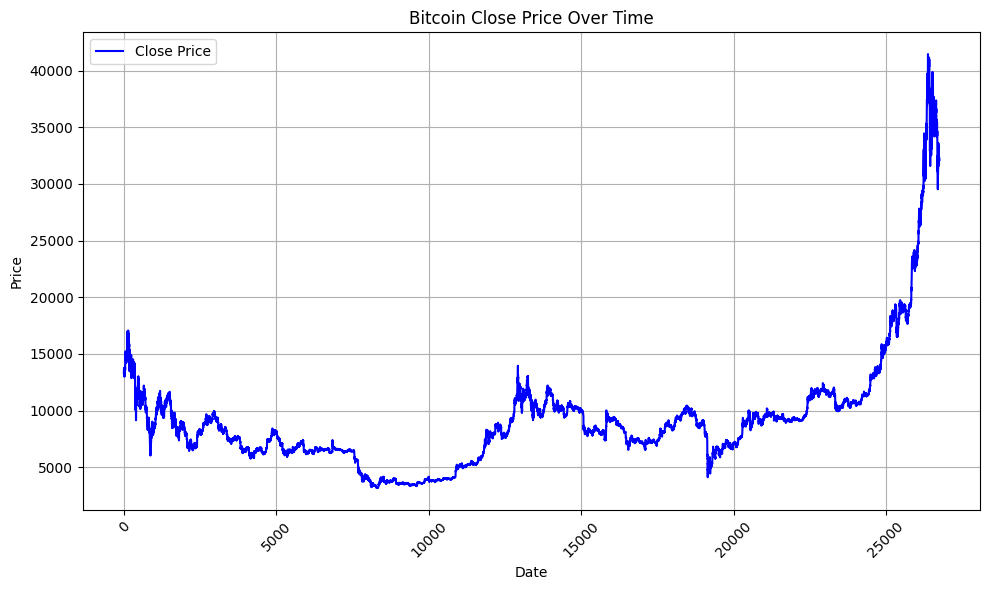

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

plt.plot(df_to_train.index, df_to_train['close'], label='Close Price', color='blue')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Close Price Over Time')

plt.xticks(rotation=45)

plt.grid(True)

plt.legend()
plt.tight_layout()
plt.show()

Calculating some Important Indicators

In [48]:

data = df_to_train.copy()

data['MA'] = data['close'].rolling(window=window_size_ma).mean()
data['ATR'] = AverageTrueRange(data['high'], data['low'], data['close'], window=14).average_true_range()
data['price_diff'] = data['close'].diff()
data['target'] = (data['price_diff'] > threshold_price_increase).astype(int)
for lag in range(1, 5):
    data[f'lag_{lag}_ATR'] = data['ATR'].shift(lag)
data

datetime      open      high       low     close  \
0      2018-01-01 05:30:00  13715.65  13715.65  13400.01  13529.01   
1      2018-01-01 06:30:00  13528.99  13595.89  13155.38  13203.06   
2      2018-01-01 07:30:00  13203.00  13418.43  13200.00  13330.18   
3      2018-01-01 08:30:00  13330.26  13611.27  13290.00  13410.03   
4      2018-01-01 09:30:00  13434.98  13623.29  13322.15  13601.01   
...                    ...       ...       ...       ...       ...   
26743  2021-01-24 00:30:00  32169.92  32500.00  32138.24  32348.79   
26744  2021-01-24 01:30:00  32348.78  32400.00  32021.73  32191.33   
26745  2021-01-24 02:30:00  32192.93  32442.68  31812.50  32344.22   
26746  2021-01-24 03:30:00  32344.21  32538.61  31966.47  32049.97   
26747  2021-01-24 04:30:00  32050.03  32122.78  31835.85  32078.00   

            volume          MA         ATR  price_diff  target   lag_1_ATR  \
0       443.356199         NaN    0.000000         NaN       0         NaN   
1       383.697006         NaN    0.000000     -325.95       0    0.000000   
2       429.064572         NaN    0.000000      127.12       1    0.000000   
3       420.087030         NaN    0.000000       79.85       0    0.000000   
4       340.807329         NaN    0.000000      190.98       1    0.000000   
...            ...         ...         ...         ...     ...         ...   
26743  2045.514331  32352.2270  611.065188      181.31       1  630.242510   
26744  1524.957919  32326.6845  594.436960     -157.46       0  611.065188   
26745  2255.056851  32308.5575  596.990034      152.89       1  594.436960   
26746  1596.251945  32298.2475  595.215032     -294.25       0  596.990034   
26747  1980.981852  32283.8970  573.194672       28.03       0  595.215032   

        lag_2_ATR   lag_3_ATR   lag_4_ATR  
0             NaN         NaN         NaN  
1             NaN         NaN         NaN  
2        0.000000         NaN         NaN  
3        0.000000    0.000000         NaN  
4        0.000000    0.000000    0.000000  
...           ...         ...         ...  
26743  638.722703  659.762911  666.792366  
26744  630.242510  638.722703  659.762911  
26745  611.065188  630.242510  638.722703  
26746  594.436960  611.065188  630.242510  
26747  596.990034  594.436960  611.065188  

[26748 rows x 14 columns]

Adding more indicators

In [49]:
def calculate_rsi(data, column, window=14):
    close_prices = data[column]
    daily_returns = close_prices.diff(1)
    gains = daily_returns.where(daily_returns > 0, 0)
    losses = -daily_returns.where(daily_returns < 0, 0)

    avg_gain = gains.rolling(window=window, min_periods=1).mean()
    avg_loss = losses.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi
def calculate_macd(data, column, slow=26, fast=12, signal=9):
    exp12 = data[column].ewm(span=fast, adjust=False).mean()
    exp26 = data[column].ewm(span=slow, adjust=False).mean()

    macd = exp12 - exp26
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    macd_hist = macd - signal_line

    return macd, signal_line, macd_hist

def calculate_stochastic_oscillator(data, high, low, close, window=14, smooth_window=3):
    high_max = high.rolling(window=window, min_periods=1).max()
    low_min = low.rolling(window=window, min_periods=1).min()

    k = ((close - low_min) / (high_max - low_min)) * 100
    d = k.rolling(window=smooth_window, min_periods=1).mean()

    return k, d

def calculate_momentum(data, column, window=15):
    return data[column].diff(window)

data["rsi"] = calculate_rsi(data, "close", window=14)
macd, signal_line, macd_hist = calculate_macd(data, "close", slow=40, fast=15, signal=9)
data["macd"] = macd
data["signal_line"] = signal_line
data["macdhist"] = macd_hist
data["kdf"], data["kds"] = calculate_stochastic_oscillator(data, data["high"], data["low"], data["close"], window=14, smooth_window=3)
data["mom"] = calculate_momentum(data, "close", window=15)
data


datetime      open      high       low     close  \
0      2018-01-01 05:30:00  13715.65  13715.65  13400.01  13529.01   
1      2018-01-01 06:30:00  13528.99  13595.89  13155.38  13203.06   
2      2018-01-01 07:30:00  13203.00  13418.43  13200.00  13330.18   
3      2018-01-01 08:30:00  13330.26  13611.27  13290.00  13410.03   
4      2018-01-01 09:30:00  13434.98  13623.29  13322.15  13601.01   
...                    ...       ...       ...       ...       ...   
26743  2021-01-24 00:30:00  32169.92  32500.00  32138.24  32348.79   
26744  2021-01-24 01:30:00  32348.78  32400.00  32021.73  32191.33   
26745  2021-01-24 02:30:00  32192.93  32442.68  31812.50  32344.22   
26746  2021-01-24 03:30:00  32344.21  32538.61  31966.47  32049.97   
26747  2021-01-24 04:30:00  32050.03  32122.78  31835.85  32078.00   

            volume          MA         ATR  price_diff  target  ...  \
0       443.356199         NaN    0.000000         NaN       0  ...   
1       383.697006         NaN    0.000000     -325.95       0  ...   
2       429.064572         NaN    0.000000      127.12       1  ...   
3       420.087030         NaN    0.000000       79.85       0  ...   
4       340.807329         NaN    0.000000      190.98       1  ...   
...            ...         ...         ...         ...     ...  ...   
26743  2045.514331  32352.2270  611.065188      181.31       1  ...   
26744  1524.957919  32326.6845  594.436960     -157.46       0  ...   
26745  2255.056851  32308.5575  596.990034      152.89       1  ...   
26746  1596.251945  32298.2475  595.215032     -294.25       0  ...   
26747  1980.981852  32283.8970  573.194672       28.03       0  ...   

        lag_2_ATR   lag_3_ATR   lag_4_ATR        rsi        macd  signal_line  \
0             NaN         NaN         NaN        NaN    0.000000     0.000000   
1             NaN         NaN         NaN   0.000000  -24.843750    -4.968750   
2        0.000000         NaN         NaN  28.057475  -35.681117   -11.111223   
3        0.000000    0.000000         NaN  38.836974  -38.397546   -16.568488   
4        0.000000    0.000000    0.000000  54.973063  -25.867943   -18.428379   
...           ...         ...         ...        ...         ...          ...   
26743  638.722703  659.762911  666.792366  34.201122 -156.042262  -134.976382   
26744  630.242510  638.722703  659.762911  38.761671 -150.883859  -138.157878   
26745  611.065188  630.242510  638.722703  39.663649 -134.017208  -137.329744   
26746  594.436960  611.065188  630.242510  35.691609 -141.589220  -138.181639   
26747  596.990034  594.436960  611.065188  42.940177 -144.891752  -139.523662   

        macdhist        kdf        kds      mom  
0       0.000000  40.869345  40.869345      NaN  
1     -19.875000   8.510183  24.689764      NaN  
2     -24.569893  31.199243  26.859590      NaN  
3     -21.829058  45.451300  28.386909      NaN  
4      -7.439564  79.538437  52.062993      NaN  
...          ...        ...        ...      ...  
26743 -21.065880  46.403884  41.708296  -233.22  
26744 -12.725982  45.525161  43.185452 -1159.27  
26745   3.312536  55.637458  49.188834  -475.89  
26746  -3.407581  38.477822  46.546814  -881.21  
26747  -5.368090  59.697451  51.270910  -865.24  

[26748 rows x 21 columns]

In [50]:
data.dropna(inplace=True)

In [51]:
target=data['target']
data = data.drop('target', axis=1)
data = data.drop('price_diff', axis=1)

In [52]:
data = data.drop(['datetime','open','high','low','close','volume'], axis=1)

Data for Doing calculations

In [53]:
data

MA         ATR   lag_1_ATR   lag_2_ATR   lag_3_ATR   lag_4_ATR  \
19     13347.6885  292.406739  300.742642  299.547460  307.283419  309.331374   
20     13341.2000  289.375543  292.406739  300.742642  299.547460  307.283419   
21     13355.0975  282.980861  289.375543  292.406739  300.742642  299.547460   
22     13361.1885  273.392228  282.980861  289.375543  292.406739  300.742642   
23     13359.6870  264.220641  273.392228  282.980861  289.375543  292.406739   
...           ...         ...         ...         ...         ...         ...   
26743  32352.2270  611.065188  630.242510  638.722703  659.762911  666.792366   
26744  32326.6845  594.436960  611.065188  630.242510  638.722703  659.762911   
26745  32308.5575  596.990034  594.436960  611.065188  630.242510  638.722703   
26746  32298.2475  595.215032  596.990034  594.436960  611.065188  630.242510   
26747  32283.8970  573.194672  595.215032  596.990034  594.436960  611.065188   

             rsi        macd  signal_line   macdhist        kdf        kds  \
19     41.616146 -126.400175   -91.084643 -35.315532  45.891161  35.792117   
20     39.628874 -109.772534   -94.822221 -14.950313  60.758972  47.560089   
21     47.386741  -89.031250   -93.664027   4.632777  74.196135  60.282089   
22     48.561459  -73.436179   -89.618457  16.182278  76.304348  70.419818   
23     42.699059  -65.496160   -84.793998  19.297838  69.389374  73.296619   
...          ...         ...          ...        ...        ...        ...   
26743  34.201122 -156.042262  -134.976382 -21.065880  46.403884  41.708296   
26744  38.761671 -150.883859  -138.157878 -12.725982  45.525161  43.185452   
26745  39.663649 -134.017208  -137.329744   3.312536  55.637458  49.188834   
26746  35.691609 -141.589220  -138.181639  -3.407581  38.477822  46.546814   
26747  42.940177 -144.891752  -139.523662  -5.368090  59.697451  51.270910   

           mom  
19     -360.64  
20     -159.75  
21     -299.40  
22     -118.35  
23     -119.99  
...        ...  
26743  -233.22  
26744 -1159.27  
26745  -475.89  
26746  -881.21  
26747  -865.24  

[26729 rows x 13 columns]

In [54]:
target

19       1
20       1
21       0
22       0
23       0
        ..
26743    1
26744    0
26745    1
26746    0
26747    0
Name: target, Length: 26729, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.1, random_state=42)
X_train

MA          ATR    lag_1_ATR    lag_2_ATR    lag_3_ATR  \
9144    3624.7245    17.725710    18.496918    19.065143    19.875538   
16312   8622.7980    47.097418    43.795681    44.929195    44.356056   
10683   3989.0255    12.598840    12.827982    12.893211    12.654227   
26497  34065.9040  1005.007829  1027.143816  1068.077956  1072.710875   
17185   7145.0395    26.120238    27.054102    28.357495    29.598071   
...           ...          ...          ...          ...          ...   
21594   9486.9060    57.787139    51.396919    47.378221    47.040391   
5409    6349.7320    90.163512    91.276859    82.989694    84.997363   
879     6666.9575   414.159637   411.095763   408.303898   400.550352   
15814   7463.8725    52.599260    51.107665    49.044408    39.195516   
23673  10902.8960    75.369686    77.541200    75.841293    75.816007   

         lag_4_ATR        rsi        macd  signal_line    macdhist        kdf  \
9144     20.282118  85.014017   27.203781    16.421480   10.782301  71.972877   
16312    45.918830  51.924949  -46.235625   -47.818179    1.582553  81.789499   
10683    10.956091  48.554618   -2.476365    -2.295457   -0.180908  78.154530   
26497  1099.609404  53.439936 -267.978266  -424.170180  156.191914  76.498258   
17185    30.544077  46.086268    5.695140     8.512831   -2.817690  72.158388   
...            ...        ...         ...          ...         ...        ...   
21594    48.752729  82.625389   85.515360    61.041857   24.473502  76.120463   
5409     83.689468  58.112492   33.190876    36.583810   -3.392934  52.689504   
879     391.284994  62.939255 -326.376641  -484.437924  158.061282  76.044980   
15814    40.829787  75.635076  -24.628446   -57.909186   33.280740  89.290287   
23673    75.074162  36.310379    3.037329    23.039094  -20.001765  43.162513   

             kds     mom  
9144   74.839472   90.41  
16312  52.817796   -7.50  
10683  69.946266    7.20  
26497  70.702671  832.32  
17185  72.848152   -1.55  
...          ...     ...  
21594  78.986811  273.19  
5409   58.166910    5.31  
879    83.629497  665.61  
15814  84.949513  188.70  
23673  33.622290 -155.36  

[24056 rows x 13 columns]

Using The Classifier Model 

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

classification_rep = classification_report(Y_test, Y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      2502
           1       0.76      0.32      0.45       171

    accuracy                           0.95      2673
   macro avg       0.86      0.66      0.71      2673
weighted avg       0.94      0.95      0.94      2673



Using XGBClassifier 

In [57]:
import xgboost as xgb
clf = xgb.XGBClassifier(random_state=42)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

classification_rep = classification_report(Y_test, Y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2502
           1       0.78      0.62      0.69       171

    accuracy                           0.96      2673
   macro avg       0.88      0.80      0.84      2673
weighted avg       0.96      0.96      0.96      2673



SHAP Plot

/home/outbreakkp/anaconda3/envs/vectorbt_env/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning:

[05:52:38] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.



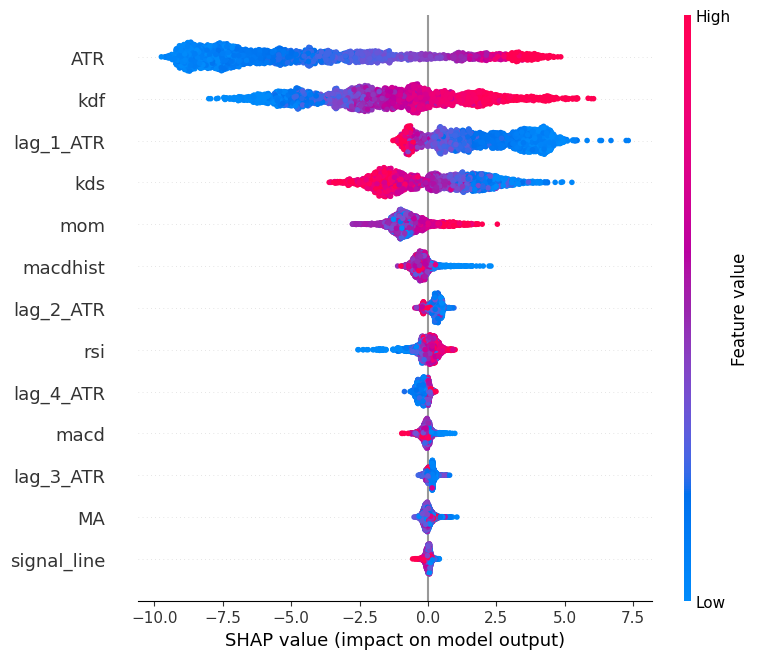

In [58]:
import shap

explainer = shap.Explainer(clf)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


LIME PLOT

In [59]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(training_data=np.array(X_train),
                                                   mode="classification",
                                                   feature_names=X_train.columns,
                                                   class_names=["Class 0", "Class 1"])

instance_to_explain = X_test.iloc[0]

explanation = explainer.explain_instance(instance_to_explain, clf.predict_proba, num_features=len(X_test.columns))

explanation.show_in_notebook()


PDP Plots

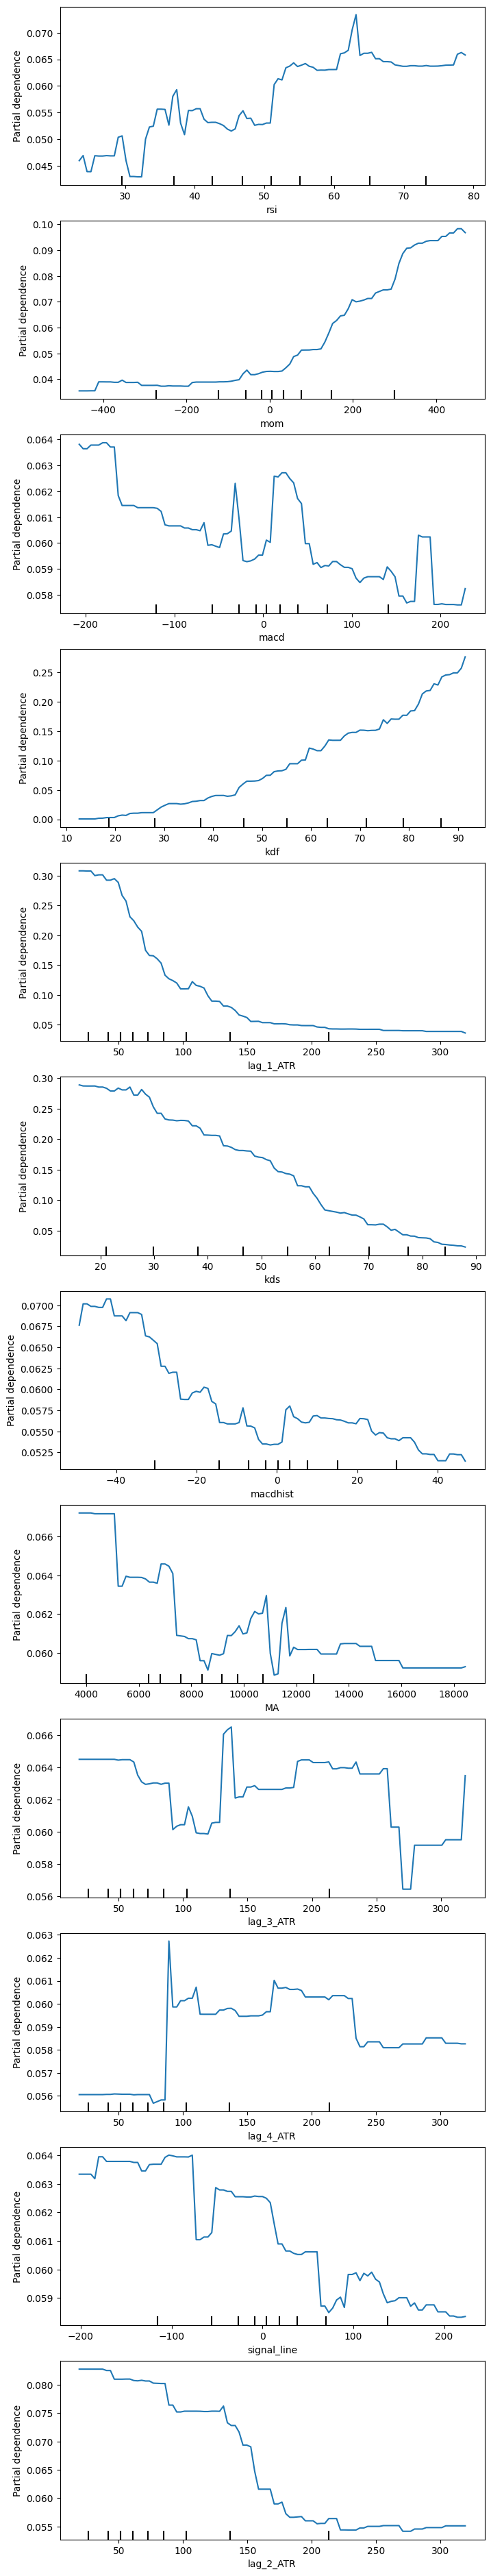

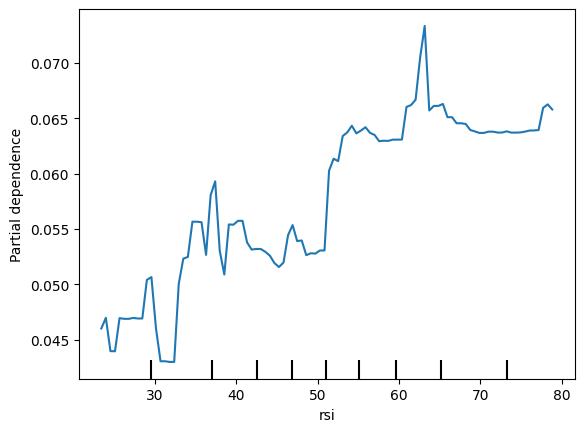

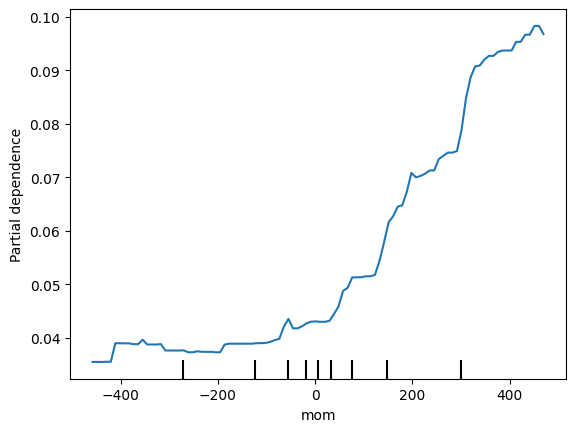

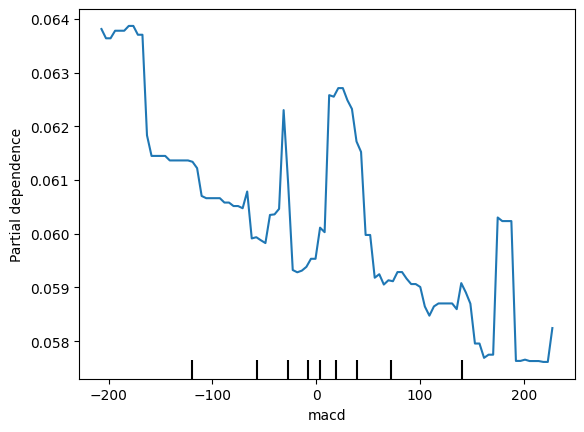

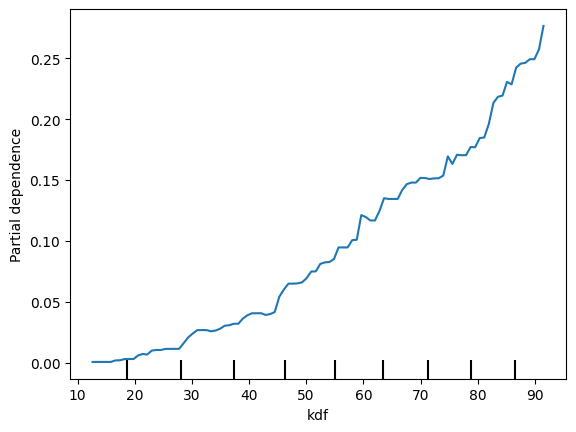

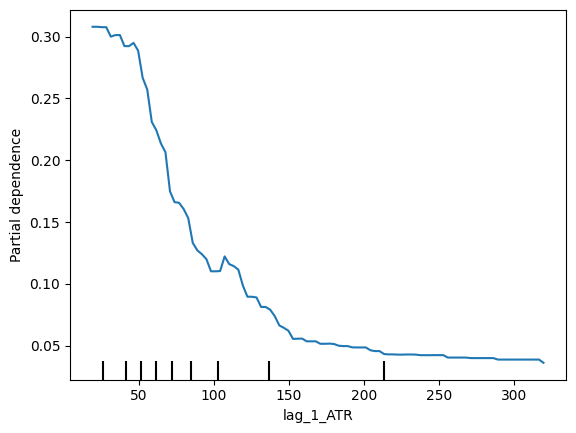

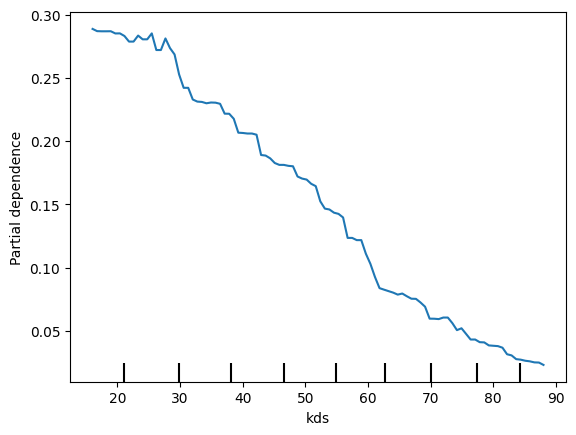

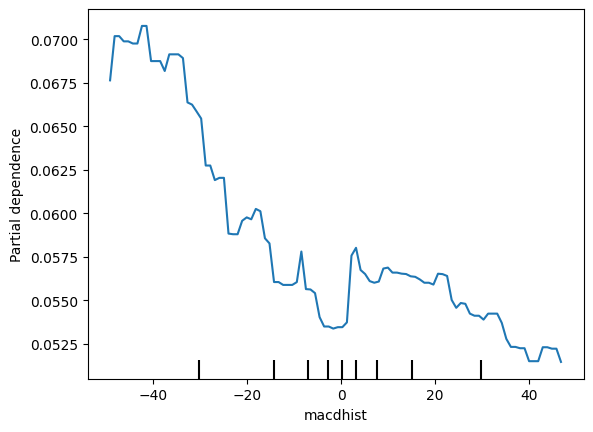

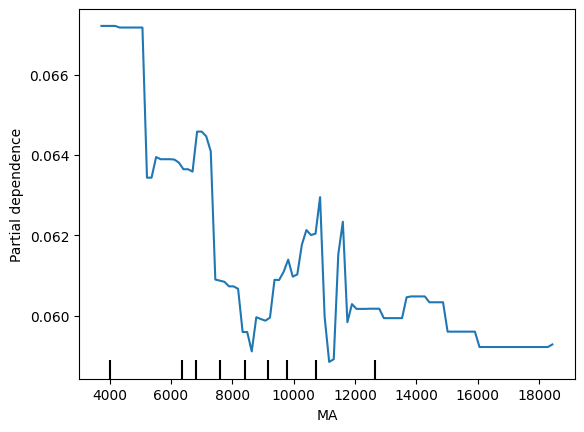

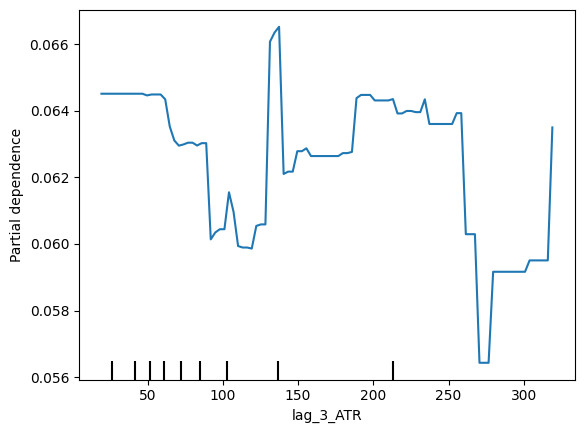

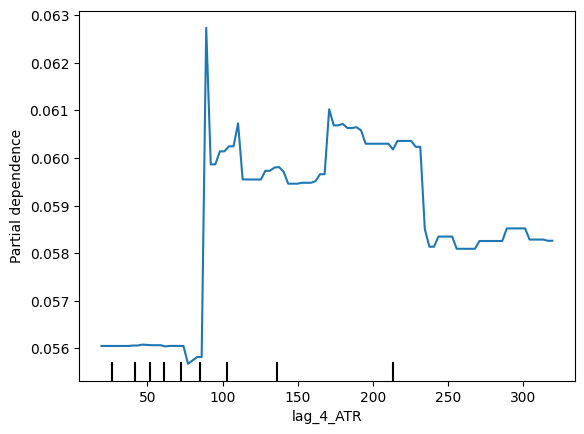

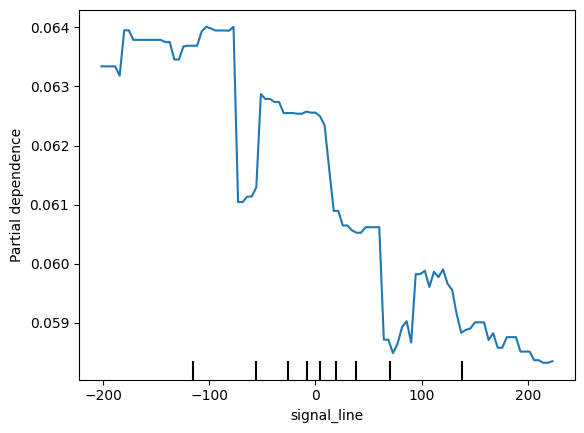

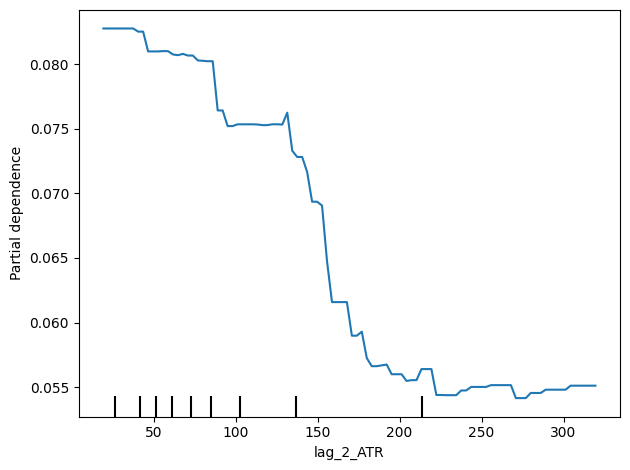

In [60]:
from sklearn.inspection import PartialDependenceDisplay
features_to_plot = ['rsi', 'mom', 'macd','kdf','lag_1_ATR','kds','macdhist','MA','lag_3_ATR','lag_4_ATR','signal_line','lag_2_ATR']

fig, axes = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(8, 4 * len(features_to_plot)))

for i, feature in enumerate(features_to_plot):
    display = PartialDependenceDisplay.from_estimator(clf, X_train, features=[feature], ax=axes[i])
    display.plot()

plt.tight_layout()
plt.show()

Saving the model

In [61]:
dump(clf, 'saved_rf_model.joblib')

['saved_rf_model.joblib']

Testing Our model

In [62]:
backtesting_df['datetime'] = pd.to_datetime(backtesting_df['datetime'])
backtesting_df.set_index('datetime', inplace=True)
backtesting_df

/tmp/ipykernel_873083/3191755357.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



open      high       low     close       volume
datetime                                                                
2021-01-24 05:30:00  32078.00  32086.75  31630.00  31876.35  2459.159672
2021-01-24 06:30:00  31876.35  32084.91  31752.81  31863.84  1404.062071
2021-01-24 07:30:00  31860.76  32300.00  31784.66  32096.04  1774.936477
2021-01-24 08:30:00  32096.04  32480.06  32020.00  32480.05  2128.038650
2021-01-24 09:30:00  32480.06  32879.99  32346.44  32811.05  4046.603906
...                       ...       ...       ...       ...          ...
2022-01-31 01:30:00  37512.37  37740.00  37351.63  37684.45  1037.922560
2022-01-31 02:30:00  37684.45  37762.60  37492.25  37729.00   874.060520
2022-01-31 03:30:00  37729.00  37855.54  37625.41  37785.78   734.658550
2022-01-31 04:30:00  37785.78  38230.00  37778.46  37881.76  1728.811800
2022-01-31 05:30:00  37881.75  37951.07  36828.32  36829.30  2907.710960

[8916 rows x 5 columns]

In [63]:
def calculate_rsi(data, column, window=14):
    close_prices = data[column]
    daily_returns = close_prices.diff(1)
    gains = daily_returns.where(daily_returns > 0, 0)
    losses = -daily_returns.where(daily_returns < 0, 0)

    avg_gain = gains.rolling(window=window, min_periods=1).mean()
    avg_loss = losses.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

def calculate_macd(data, column, slow=26, fast=12, signal=9):
    exp12 = data[column].ewm(span=fast, adjust=False).mean()
    exp26 = data[column].ewm(span=slow, adjust=False).mean()

    macd = exp12 - exp26
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    macd_hist = macd - signal_line

    return macd, signal_line, macd_hist

def calculate_stochastic_oscillator(data, high, low, close, window=14, smooth_window=3):
    high_max = high.rolling(window=window, min_periods=1).max()
    low_min = low.rolling(window=window, min_periods=1).min()

    k = ((close - low_min) / (high_max - low_min)) * 100
    d = k.rolling(window=smooth_window, min_periods=1).mean()

    return k, d

def calculate_momentum(data, column, window=15):
    return data[column].diff(window)





In [64]:
backtesting_df['MA'] = backtesting_df['close'].rolling(window=window_size_ma).mean()

backtesting_df['ATR'] = AverageTrueRange(backtesting_df['high'], backtesting_df['low'], backtesting_df['close'], window=14).average_true_range()

for lag in range(1, 5):
    backtesting_df[f'lag_{lag}_ATR'] = backtesting_df['ATR'].shift(lag)

backtesting_df["rsi"] = calculate_rsi(backtesting_df, "close", window=14)
macd, signal_line, macd_hist = calculate_macd(backtesting_df, "close", slow=40, fast=15, signal=9)
backtesting_df["macd"] = macd
backtesting_df["signal_line"] = signal_line
backtesting_df["macdhist"] = macd_hist
backtesting_df["kdf"], backtesting_df["kds"] = calculate_stochastic_oscillator(backtesting_df, backtesting_df["high"], backtesting_df["low"], backtesting_df["close"], window=14, smooth_window=3)
backtesting_df["mom"] = calculate_momentum(backtesting_df, "close", window=15)
backtesting_df

/tmp/ipykernel_873083/1807439808.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_873083/1807439808.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_873083/1807439808.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykerne

open      high       low     close       volume  \
datetime                                                                   
2021-01-24 05:30:00  32078.00  32086.75  31630.00  31876.35  2459.159672   
2021-01-24 06:30:00  31876.35  32084.91  31752.81  31863.84  1404.062071   
2021-01-24 07:30:00  31860.76  32300.00  31784.66  32096.04  1774.936477   
2021-01-24 08:30:00  32096.04  32480.06  32020.00  32480.05  2128.038650   
2021-01-24 09:30:00  32480.06  32879.99  32346.44  32811.05  4046.603906   
...                       ...       ...       ...       ...          ...   
2022-01-31 01:30:00  37512.37  37740.00  37351.63  37684.45  1037.922560   
2022-01-31 02:30:00  37684.45  37762.60  37492.25  37729.00   874.060520   
2022-01-31 03:30:00  37729.00  37855.54  37625.41  37785.78   734.658550   
2022-01-31 04:30:00  37785.78  38230.00  37778.46  37881.76  1728.811800   
2022-01-31 05:30:00  37881.75  37951.07  36828.32  36829.30  2907.710960   

                             MA         ATR   lag_1_ATR   lag_2_ATR  \
datetime                                                              
2021-01-24 05:30:00         NaN    0.000000         NaN         NaN   
2021-01-24 06:30:00         NaN    0.000000    0.000000         NaN   
2021-01-24 07:30:00         NaN    0.000000    0.000000    0.000000   
2021-01-24 08:30:00         NaN    0.000000    0.000000    0.000000   
2021-01-24 09:30:00         NaN    0.000000    0.000000    0.000000   
...                         ...         ...         ...         ...   
2022-01-31 01:30:00  37956.4560  299.172369  292.311013  285.210322   
2022-01-31 02:30:00  37946.3185  297.113629  299.172369  292.311013   
2022-01-31 03:30:00  37938.0175  292.329084  297.113629  299.172369   
2022-01-31 04:30:00  37936.2490  303.701292  292.329084  297.113629   
2022-01-31 05:30:00  37872.7470  362.204771  303.701292  292.329084   

                      lag_3_ATR   lag_4_ATR        rsi        macd  \
datetime                                                             
2021-01-24 05:30:00         NaN         NaN        NaN    0.000000   
2021-01-24 06:30:00         NaN         NaN   0.000000   -0.953506   
2021-01-24 07:30:00         NaN         NaN  94.887826   15.956859   
2021-01-24 08:30:00    0.000000         NaN  98.010243   59.203402   
2021-01-24 09:30:00    0.000000    0.000000  98.696495  120.065900   
...                         ...         ...        ...         ...   
2022-01-31 01:30:00  291.257270  294.957829  40.961362   63.663720   
2022-01-31 02:30:00  285.210322  291.257270  38.211991   49.646670   
2022-01-31 03:30:00  292.311013  285.210322  44.645517   42.005060   
2022-01-31 04:30:00  299.172369  292.311013  49.805624   42.704238   
2022-01-31 05:30:00  297.113629  299.172369  25.293105  -37.192204   

                     signal_line    macdhist        kdf        kds      mom  
datetime                                                                     
2021-01-24 05:30:00     0.000000    0.000000  53.935413  53.935413      NaN  
2021-01-24 06:30:00    -0.190701   -0.762805  51.196497  52.565955      NaN  
2021-01-24 07:30:00     3.038811   12.918048  69.558209  58.230040      NaN  
2021-01-24 08:30:00    14.271729   44.931673  99.998824  73.584510      NaN  
2021-01-24 09:30:00    35.430563   84.635337  94.484756  88.013929      NaN  
...                          ...         ...        ...        ...      ...  
2022-01-31 01:30:00   139.204934  -75.541214  33.029981  19.158480  -454.94  
2022-01-31 02:30:00   121.293281  -71.646611  37.451247  26.033540  -369.51  
2022-01-31 03:30:00   105.435637  -63.430577  47.839693  39.440307  -459.20  
2022-01-31 04:30:00    92.889357  -50.185119  58.415885  47.902275  -118.24  
2022-01-31 05:30:00    66.873045 -104.065249   0.068492  35.441357 -1060.18  

[8916 rows x 18 columns]

In [65]:
backtesting_df.dropna(inplace=True)
backtesting_df

/tmp/ipykernel_873083/354576513.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



open      high       low     close       volume  \
datetime                                                                   
2021-01-25 00:30:00  31831.66  31841.47  30900.00  31306.29  5345.533596   
2021-01-25 01:30:00  31306.29  31757.17  31250.26  31673.26  2860.482417   
2021-01-25 02:30:00  31673.26  31977.60  31573.31  31909.46  1744.665865   
2021-01-25 03:30:00  31909.46  32348.40  31650.00  32127.97  1991.433164   
2021-01-25 04:30:00  32127.97  32369.59  32015.46  32259.90  2337.613427   
...                       ...       ...       ...       ...          ...   
2022-01-31 01:30:00  37512.37  37740.00  37351.63  37684.45  1037.922560   
2022-01-31 02:30:00  37684.45  37762.60  37492.25  37729.00   874.060520   
2022-01-31 03:30:00  37729.00  37855.54  37625.41  37785.78   734.658550   
2022-01-31 04:30:00  37785.78  38230.00  37778.46  37881.76  1728.811800   
2022-01-31 05:30:00  37881.75  37951.07  36828.32  36829.30  2907.710960   

                             MA         ATR   lag_1_ATR   lag_2_ATR  \
datetime                                                              
2021-01-25 00:30:00  32283.8820  438.141524  399.423949  416.706560   
2021-01-25 01:30:00  32273.7275  443.053558  438.141524  399.423949   
2021-01-25 02:30:00  32276.0085  440.284732  443.053558  438.141524   
2021-01-25 03:30:00  32277.6050  458.721537  440.284732  443.053558   
2021-01-25 04:30:00  32266.5975  451.250713  458.721537  440.284732   
...                         ...         ...         ...         ...   
2022-01-31 01:30:00  37956.4560  299.172369  292.311013  285.210322   
2022-01-31 02:30:00  37946.3185  297.113629  299.172369  292.311013   
2022-01-31 03:30:00  37938.0175  292.329084  297.113629  299.172369   
2022-01-31 04:30:00  37936.2490  303.701292  292.329084  297.113629   
2022-01-31 05:30:00  37872.7470  362.204771  303.701292  292.329084   

                      lag_3_ATR   lag_4_ATR        rsi       macd  \
datetime                                                            
2021-01-25 00:30:00  421.783988  405.028910  16.033999 -35.182116   
2021-01-25 01:30:00  416.706560  421.783988  28.806320 -62.515727   
2021-01-25 02:30:00  399.423949  416.706560  33.780790 -66.881716   
2021-01-25 03:30:00  438.141524  399.423949  41.016051 -53.453062   
2021-01-25 04:30:00  443.053558  438.141524  43.458873 -31.894591   
...                         ...         ...        ...        ...   
2022-01-31 01:30:00  291.257270  294.957829  40.961362  63.663720   
2022-01-31 02:30:00  285.210322  291.257270  38.211991  49.646670   
2022-01-31 03:30:00  292.311013  285.210322  44.645517  42.005060   
2022-01-31 04:30:00  299.172369  292.311013  49.805624  42.704238   
2022-01-31 05:30:00  297.113629  299.172369  25.293105 -37.192204   

                     signal_line    macdhist        kdf        kds      mom  
datetime                                                                     
2021-01-25 00:30:00   100.676337 -135.858453  18.714417  20.735699 -1504.76  
2021-01-25 01:30:00    68.037924 -130.553651  36.303286  25.376578 -1198.72  
2021-01-25 02:30:00    41.053996 -107.935712  47.392488  34.136731  -847.56  
2021-01-25 03:30:00    22.152585  -75.605647  60.443790  48.046522  -673.18  
2021-01-25 04:30:00    11.343150  -43.237740  66.937719  58.257999  -370.58  
...                          ...         ...        ...        ...      ...  
2022-01-31 01:30:00   139.204934  -75.541214  33.029981  19.158480  -454.94  
2022-01-31 02:30:00   121.293281  -71.646611  37.451247  26.033540  -369.51  
2022-01-31 03:30:00   105.435637  -63.430577  47.839693  39.440307  -459.20  
2022-01-31 04:30:00    92.889357  -50.185119  58.415885  47.902275  -118.24  
2022-01-31 05:30:00    66.873045 -104.065249   0.068492  35.441357 -1060.18  

[8897 rows x 18 columns]

In [66]:
loaded_clf = load('saved_rf_model.joblib')


In [67]:
prediction_coloumn_features = backtesting_df[['MA', 'ATR', 'lag_1_ATR', 'lag_2_ATR', 'lag_3_ATR', 'lag_4_ATR','rsi','macd','signal_line','macdhist','kdf','kds','mom']]
predictions = loaded_clf.predict(prediction_coloumn_features)

In [68]:
predictions

array([0, 1, 1, ..., 1, 1, 0])

In [69]:
len(predictions)

8897

In [70]:
backtesting_df

open      high       low     close       volume  \
datetime                                                                   
2021-01-25 00:30:00  31831.66  31841.47  30900.00  31306.29  5345.533596   
2021-01-25 01:30:00  31306.29  31757.17  31250.26  31673.26  2860.482417   
2021-01-25 02:30:00  31673.26  31977.60  31573.31  31909.46  1744.665865   
2021-01-25 03:30:00  31909.46  32348.40  31650.00  32127.97  1991.433164   
2021-01-25 04:30:00  32127.97  32369.59  32015.46  32259.90  2337.613427   
...                       ...       ...       ...       ...          ...   
2022-01-31 01:30:00  37512.37  37740.00  37351.63  37684.45  1037.922560   
2022-01-31 02:30:00  37684.45  37762.60  37492.25  37729.00   874.060520   
2022-01-31 03:30:00  37729.00  37855.54  37625.41  37785.78   734.658550   
2022-01-31 04:30:00  37785.78  38230.00  37778.46  37881.76  1728.811800   
2022-01-31 05:30:00  37881.75  37951.07  36828.32  36829.30  2907.710960   

                             MA         ATR   lag_1_ATR   lag_2_ATR  \
datetime                                                              
2021-01-25 00:30:00  32283.8820  438.141524  399.423949  416.706560   
2021-01-25 01:30:00  32273.7275  443.053558  438.141524  399.423949   
2021-01-25 02:30:00  32276.0085  440.284732  443.053558  438.141524   
2021-01-25 03:30:00  32277.6050  458.721537  440.284732  443.053558   
2021-01-25 04:30:00  32266.5975  451.250713  458.721537  440.284732   
...                         ...         ...         ...         ...   
2022-01-31 01:30:00  37956.4560  299.172369  292.311013  285.210322   
2022-01-31 02:30:00  37946.3185  297.113629  299.172369  292.311013   
2022-01-31 03:30:00  37938.0175  292.329084  297.113629  299.172369   
2022-01-31 04:30:00  37936.2490  303.701292  292.329084  297.113629   
2022-01-31 05:30:00  37872.7470  362.204771  303.701292  292.329084   

                      lag_3_ATR   lag_4_ATR        rsi       macd  \
datetime                                                            
2021-01-25 00:30:00  421.783988  405.028910  16.033999 -35.182116   
2021-01-25 01:30:00  416.706560  421.783988  28.806320 -62.515727   
2021-01-25 02:30:00  399.423949  416.706560  33.780790 -66.881716   
2021-01-25 03:30:00  438.141524  399.423949  41.016051 -53.453062   
2021-01-25 04:30:00  443.053558  438.141524  43.458873 -31.894591   
...                         ...         ...        ...        ...   
2022-01-31 01:30:00  291.257270  294.957829  40.961362  63.663720   
2022-01-31 02:30:00  285.210322  291.257270  38.211991  49.646670   
2022-01-31 03:30:00  292.311013  285.210322  44.645517  42.005060   
2022-01-31 04:30:00  299.172369  292.311013  49.805624  42.704238   
2022-01-31 05:30:00  297.113629  299.172369  25.293105 -37.192204   

                     signal_line    macdhist        kdf        kds      mom  
datetime                                                                     
2021-01-25 00:30:00   100.676337 -135.858453  18.714417  20.735699 -1504.76  
2021-01-25 01:30:00    68.037924 -130.553651  36.303286  25.376578 -1198.72  
2021-01-25 02:30:00    41.053996 -107.935712  47.392488  34.136731  -847.56  
2021-01-25 03:30:00    22.152585  -75.605647  60.443790  48.046522  -673.18  
2021-01-25 04:30:00    11.343150  -43.237740  66.937719  58.257999  -370.58  
...                          ...         ...        ...        ...      ...  
2022-01-31 01:30:00   139.204934  -75.541214  33.029981  19.158480  -454.94  
2022-01-31 02:30:00   121.293281  -71.646611  37.451247  26.033540  -369.51  
2022-01-31 03:30:00   105.435637  -63.430577  47.839693  39.440307  -459.20  
2022-01-31 04:30:00    92.889357  -50.185119  58.415885  47.902275  -118.24  
2022-01-31 05:30:00    66.873045 -104.065249   0.068492  35.441357 -1060.18  

[8897 rows x 18 columns]

In [71]:
actual=[1]
for i,v in enumerate(backtesting_df['close']):
    if(i==0):
        continue
    if(backtesting_df['close'][i]>=backtesting_df['close'][i-1]):
        actual.append(1)
    else:
        actual.append(0)
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(actual,predictions))
print(accuracy_score(actual,predictions)*100)

              precision    recall  f1-score   support

           0       0.70      0.91      0.79      4409
           1       0.88      0.62      0.73      4488

    accuracy                           0.77      8897
   macro avg       0.79      0.77      0.76      8897
weighted avg       0.79      0.77      0.76      8897

76.59885354613914


Cal

In [72]:
# df_predict["Signal"] = np.where(df_predict["Buy"] > 0.5, 1, 0)
import numpy as np
# invest=10000
losses=[]
maxloss=100
capital=10000
brokerage=0.0015
loss_mag_max=0
profit_mag_max=0
ini=capital
gross_profit=0
net_profit=0
trades_profit=0
trades_loss=0
thr=5000
factl=0.5
factp=1.8
trades=0
days=0
fact=0.05
gross_loss=0
net_loss=0
actual_returns=[]
price_earnings_ratio=[]
equities=[]

for ind,i in enumerate(predictions):
  equities.append(capital)
  invest=capital*fact
  capital-=invest
  invest_brok=(1-brokerage)*invest
  
  if(i==1):
    trades+=1
    days+=1
    # capital*=0.85
    mul=backtesting_df['close'][ind]/backtesting_df['open'][ind]
    # capital+=(mul)*invest_brok
    
    # if(mul<1):
    #   loss=(1-mul)*invest_brok
    #   loss_mag_max=max(loss_mag_max,loss)
    # else:
    #   net_profit+=(mul-1)*invest_brok
    #   gross_profit+=(mul-1)*invest



    # capital*=randarr[ind]
    # if(capital/ini<=factl):
    #   print("Maa chud gayi paisa bacha = {}".format(capital))
    #   break
    # if(capital/ini>=factp):
    #   print("Maja aa gaya paisa bacha = {}".format(capital))
    #   break


    

  else:
    trades+=1
    mul=backtesting_df['open'][ind]/backtesting_df['close'][ind]
    # capital+=(mul)*invest_brok
  capital+=(mul)*invest_brok
  actual_returns.append(mul-1)
  if(mul<=1):
    trades_loss+=1
    loss=(1-mul)*invest_brok
    
    gross_loss+=(1-mul)*invest
    net_loss+=loss
    loss_mag_max=max(loss_mag_max,loss)
    loss_percent=(mul-1)*100
    losses.append((mul-1)*100)
    maxloss=min(loss_percent,maxloss)
  else:
    price_earnings_ratio.append(invest_brok/(abs(backtesting_df['close'][ind]-backtesting_df['open'][ind])))
    trades_profit+=1
    net_profit+=(mul-1)*invest_brok
    profit_mag_max=max(profit_mag_max,(mul-1)*invest_brok)
    gross_profit+=(mul-1)*invest
max_dip=0
# print(price_earnings_ratio)
# print(price_earnings_ratio[1]-price_earnings_ratio[0]
sums=0
for i, p_e in enumerate(price_earnings_ratio):
  if i==0:
    continue
  max_dip=max(max_dip,(price_earnings_ratio[i-1]-p_e)/price_earnings_ratio[i-1]*100)
  sums+=((price_earnings_ratio[i-1]-p_e)/price_earnings_ratio[i-1])
  if i>100:
    continue
  # print(price_earnings_ratio[i-1]-p_e)


equities.append(capital)
actual_returns=np.array(actual_returns)

  
  # if(mul<1):
  #     losses.append((mul-1)*100)
  #     loss=(mul-1)*100
  #     maxloss=min(loss,maxloss)

# print(capital,maxloss,trades)
income=capital-ini
print(f"Largest Losing Trade:{loss_mag_max}")
print(f"gross_profit: {gross_profit}")
print(f"net_profit: {net_profit}")
print(f"close_trades: {trades}")
print(f"open_trades: {0}")
print(f"max_drawdown: {maxloss}")
print(f"Maximum Loss: {loss_mag_max}")
print(f"Average Losing Trade:{net_loss/trades_loss}")
print(f"Average Winning Trade:{net_profit/trades_profit}")
print(f"Average Losing Trade:{net_loss/trades_loss}")
print(f"Buy and Hold Return: {((backtesting_df['close'][-1]-backtesting_df['open'][0]+income)/backtesting_df['open'][0])*100}")
print(f"Largest Losing Trade:{loss_mag_max}")
print(f"Largest Winning Trade:{profit_mag_max}")
print(f"Average Holding Duration per Trade: {1}")
print(f"Sharpe Ratio: {np.mean(actual_returns)/np.std(actual_returns)}")
print(f"Sortino Ratio: {np.mean(actual_returns)/np.std(np.minimum(0,actual_returns))}")
print(f"Max Dip: {max_dip}")
print(f"Average Dip: {sums/(len(price_earnings_ratio)-1)}")


Largest Losing Trade:88.64483584068014
gross_profit: 50380.069525745006
net_profit: 50304.49942145645
close_trades: 8897
open_trades: 0
max_drawdown: -6.444691630072064
Maximum Loss: 88.64483584068014
Average Losing Trade:3.3456664361396777
Average Winning Trade:7.380354962068141
Average Losing Trade:3.3456664361396777
Buy and Hold Return: 102.85230883821612
Largest Losing Trade:88.64483584068014
Largest Winning Trade:89.13005507608007
Average Holding Duration per Trade: 1
Sharpe Ratio: 0.5972699637914145
Sortino Ratio: 2.1006085691715244
Max Dip: 99.9487972778143
Average Dip: -3.94007930686994


In [73]:
FinalDashboard_df=backtesting_df
# FinalDashboard_df['PE']=price_earnings_ratio
FinalDashboard_df=FinalDashboard_df.reset_index()
FinalDashboard_df

datetime      open      high       low     close       volume  \
0    2021-01-25 00:30:00  31831.66  31841.47  30900.00  31306.29  5345.533596   
1    2021-01-25 01:30:00  31306.29  31757.17  31250.26  31673.26  2860.482417   
2    2021-01-25 02:30:00  31673.26  31977.60  31573.31  31909.46  1744.665865   
3    2021-01-25 03:30:00  31909.46  32348.40  31650.00  32127.97  1991.433164   
4    2021-01-25 04:30:00  32127.97  32369.59  32015.46  32259.90  2337.613427   
...                  ...       ...       ...       ...       ...          ...   
8892 2022-01-31 01:30:00  37512.37  37740.00  37351.63  37684.45  1037.922560   
8893 2022-01-31 02:30:00  37684.45  37762.60  37492.25  37729.00   874.060520   
8894 2022-01-31 03:30:00  37729.00  37855.54  37625.41  37785.78   734.658550   
8895 2022-01-31 04:30:00  37785.78  38230.00  37778.46  37881.76  1728.811800   
8896 2022-01-31 05:30:00  37881.75  37951.07  36828.32  36829.30  2907.710960   

              MA         ATR   lag_1_ATR   lag_2_ATR   lag_3_ATR   lag_4_ATR  \
0     32283.8820  438.141524  399.423949  416.706560  421.783988  405.028910   
1     32273.7275  443.053558  438.141524  399.423949  416.706560  421.783988   
2     32276.0085  440.284732  443.053558  438.141524  399.423949  416.706560   
3     32277.6050  458.721537  440.284732  443.053558  438.141524  399.423949   
4     32266.5975  451.250713  458.721537  440.284732  443.053558  438.141524   
...          ...         ...         ...         ...         ...         ...   
8892  37956.4560  299.172369  292.311013  285.210322  291.257270  294.957829   
8893  37946.3185  297.113629  299.172369  292.311013  285.210322  291.257270   
8894  37938.0175  292.329084  297.113629  299.172369  292.311013  285.210322   
8895  37936.2490  303.701292  292.329084  297.113629  299.172369  292.311013   
8896  37872.7470  362.204771  303.701292  292.329084  297.113629  299.172369   

            rsi       macd  signal_line    macdhist        kdf        kds  \
0     16.033999 -35.182116   100.676337 -135.858453  18.714417  20.735699   
1     28.806320 -62.515727    68.037924 -130.553651  36.303286  25.376578   
2     33.780790 -66.881716    41.053996 -107.935712  47.392488  34.136731   
3     41.016051 -53.453062    22.152585  -75.605647  60.443790  48.046522   
4     43.458873 -31.894591    11.343150  -43.237740  66.937719  58.257999   
...         ...        ...          ...         ...        ...        ...   
8892  40.961362  63.663720   139.204934  -75.541214  33.029981  19.158480   
8893  38.211991  49.646670   121.293281  -71.646611  37.451247  26.033540   
8894  44.645517  42.005060   105.435637  -63.430577  47.839693  39.440307   
8895  49.805624  42.704238    92.889357  -50.185119  58.415885  47.902275   
8896  25.293105 -37.192204    66.873045 -104.065249   0.068492  35.441357   

          mom  
0    -1504.76  
1    -1198.72  
2     -847.56  
3     -673.18  
4     -370.58  
...       ...  
8892  -454.94  
8893  -369.51  
8894  -459.20  
8895  -118.24  
8896 -1060.18  

[8897 rows x 19 columns]

In [74]:
fig = px.line(backtesting_df, x=backtesting_df.index, y='close', labels={'x': 'Time', 'y': 'Close Price'},
              title='Trading History Visualization')

fig.add_trace(px.scatter(backtesting_df[predictions == 1], x=backtesting_df.index[predictions == 1],
                         y='close', color_discrete_sequence=['green'],
                         labels={'x': 'Buy Signal', 'y': 'Close Price'}).data[0])

fig.add_trace(px.scatter(backtesting_df[predictions == 0], x=backtesting_df.index[predictions == 0],
                         y='close', color_discrete_sequence=['red'],
                         labels={'x': 'Sell Signal', 'y': 'Close Price'}).data[0])
fig.show()

In [75]:
import plotly.graph_objects as go
import numpy as np

capital = 10000
fact = 0.05
brokerage = 0.0015
trades = 0
actual_returns = []
price_earnings_ratio = []
equity_curve = [capital]
for ind, i in enumerate(predictions):
    invest = capital * fact
    capital -= invest
    invest_brok = (1 - brokerage) * invest
    if i == 1:
        trades += 1
        mul = backtesting_df['close'][ind] / backtesting_df['open'][ind]
    else:
        trades += 1
        mul = backtesting_df['open'][ind] / backtesting_df['close'][ind]
    capital += (mul - 1) * invest_brok
    actual_returns = np.append(actual_returns, mul - 1)
    price_earnings_ratio.append(invest_brok / (abs(backtesting_df['close'][ind] - backtesting_df['open'][ind])))
    equity_curve.append(capital)

days = np.arange(len(predictions) + 1)
#you have to cut above part and pass y=actual_returns list
fig_actual_returns = go.Figure()
fig_actual_returns.add_trace(go.Scatter(x=days, y=actual_returns, mode='lines', name='Actual Returns', line=dict(color='blue')))
fig_actual_returns.add_trace(go.Scatter(x=days, y=[0] * len(days), mode='lines', name='Zero Line', line=dict(color='black', dash='dash')))
fig_actual_returns.update_layout(title='Actual Returns Over Time',
                                 xaxis=dict(title='Days'),
                                 yaxis=dict(title='Returns'))
fig_actual_returns.show()

/tmp/ipykernel_873083/250051295.py:23: RuntimeWarning:

divide by zero encountered in double_scalars



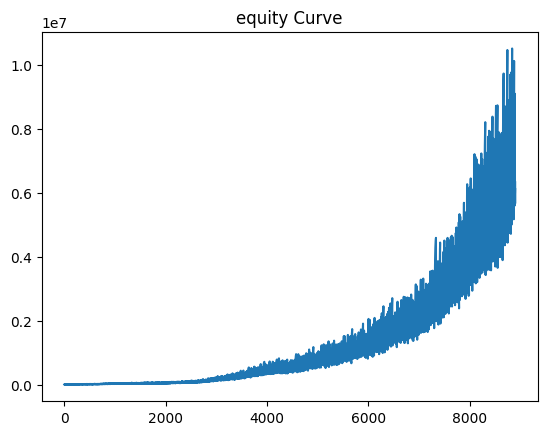

In [78]:
x=[i+1 for i in range(len(equity))]

plt.title("equity Curve")
plt.plot(x,equity)
plt.show()

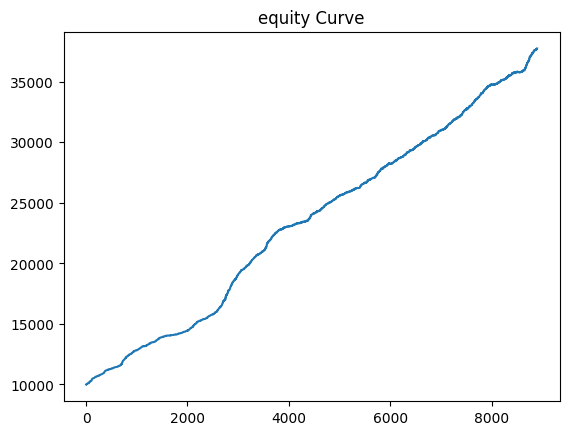

In [76]:
#Equity Curve
x=[i+1 for i in range(len(equity))]

plt.title("equity Curve")
plt.plot(x,equities)
plt.show()


In [77]:
losses=[]
maxloss_percent=0
maxprofit_percent=0
total_profit_percent=0
capital=10000
brokerage=0.0015
loss_mag_max=0
profit_mag_max=0
ini=capital
gross_profit=0
net_profit=0
trades_profit=0
trades_loss=0
thr=5000
factl=0.5
factp=1.8
hedge_factor=0.8
trades=0
days=0
fact=0.1
gross_loss=0
net_loss=0
actual_returns=[]
price_earnings_ratio=[]
holds=[]
hold=0
# print(len(predictions))
equity=[]
prev=predictions[0]
n_shares=0
total_loss_percent=0
invested=0
for ind,i in enumerate(predictions):
  equity.append(capital)
  invest=capital*fact
  # print(capital,end=" ")
  # capital-=invest
  invest_brok=(1-brokerage)*invest
  # invested+=invest_brok

  if(i==1):
    trades+=1
    days+=1
    mul=backtesting_df['close'][ind]/backtesting_df['open'][ind]
  else:
    trades+=1
    mul=backtesting_df['open'][ind]/backtesting_df['close'][ind]
  # print(f"mul: {mul}",end=',')

  actual_returns.append(abs(mul))
  if(mul<=1):
    trades_loss+=1
    loss=(abs(hedge_factor*invested)+invest_brok)*(1-mul)
    loss_mag_max=max(loss_mag_max,loss)
    gross_loss+=loss
    maxloss_percent=max((1-mul)*100,maxloss_percent)
    loss_percent=(1-mul)*100
    total_loss_percent+=loss_percent

  else:
    trades_profit+=1
    profit=(abs(hedge_factor*invested)+invest_brok)*mul
    gross_profit+=profit
    profit_mag_max=max(profit_mag_max,profit)
    maxprofit_percent=max((mul-1)*100,maxprofit_percent)
    profit_percent=(mul-1)*100
    total_profit_percent+=profit_percent
    price_earnings_ratio.append((invest_brok+hedge_factor*invested)/(abs(backtesting_df['close'][ind]-backtesting_df['open'][ind])))
  if(ind==0):
    if i==1:
      n_shares+=invest_brok/backtesting_df['open'][0]
      capital-=invest
      invested=invest_brok*mul
    else:
      n_shares-=invest_brok/backtesting_df['open'][0]
      capital+=invest_brok
      invested=-(invest_brok/mul)

  if prev!=i:
    holds.append(hold)
    hold=0
    capital+=(n_shares*(backtesting_df['close'][ind-1])*(1-brokerage))
    if(i==1):
      n_shares=invest_brok/backtesting_df['open'][ind]
      capital-=invest
      invested=invest_brok*mul
    else:
      n_shares=-invest_brok/backtesting_df['open'][ind]
      capital+=invest_brok
      invested=-invest_brok*mul
  else:
    hold+=1
    if(i==1):
      withdraw=invested*(1-hedge_factor)
      # if(withdraw)
      capital+=withdraw*(1-brokerage)
      n_shares-=withdraw/(backtesting_df['close'][ind-1])
      invested*=hedge_factor
      invest=capital*fact
      capital-=invest
      invest_brok=invest*(1-brokerage)
      n_shares+=invest_brok/backtesting_df['open'][ind]
      invested+=invest_brok
      invested*=mul
    else:
      deposit=(invested*(1-hedge_factor))
      capital+=deposit/(1-brokerage)
      n_shares-=(deposit*(1-brokerage))/backtesting_df['close'][ind-1]
      # invested/=mul
      invested*=hedge_factor
      sell=capital*fact
      sell_brok=sell*(1-brokerage)
      capital+=sell_brok
      n_shares-=sell_brok/backtesting_df['open'][ind]
      invested-=sell_brok
      invested/=mul
  prev=i

max_dip=0
sums=0
for i, p_e in enumerate(price_earnings_ratio):
  if i==0:
    continue
  max_dip=max(max_dip,(price_earnings_ratio[i-1]-p_e)/price_earnings_ratio[i-1]*100)
  sums+=((price_earnings_ratio[i-1]-p_e)/price_earnings_ratio[i-1])
  if i>100:
    continue
actual_returns=np.array(actual_returns)

income=capital-ini
# print(capital+invested+n_shares*(backtesting_df['close'][-1]))
capital=capital+invested+n_shares*(backtesting_df['close'][-1])
holds=np.array(holds)
equity.append(capital)
print(f"Largest Losing Trade:{loss_mag_max}")
print(f"gross_profit: {gross_profit}")
print(f"net_profit: {gross_profit/(1-brokerage)}")
print(f"close_trades: {trades}")
print(f"open_trades: {trades}")
print(f"max_drawdown: {maxloss_percent}")
print(f"Maximum Loss: {loss_mag_max}")
print(f"Average Losing Trade:{gross_loss/trades_loss}")
print(f"Average Winning Trade:{gross_profit/trades_profit}")
print(f"Buy and Hold Return: {((backtesting_df['close'][-1]-backtesting_df['open'][0]+income)/backtesting_df['open'][0])*100}")
print(f"Largest Losing Trade:{loss_mag_max}")
print(f"Largest Winning Trade:{profit_mag_max}")
print(f"Average Holding Duration per Trade: {np.mean(holds)}")
print(f"Sortino Ratio: {np.mean(actual_returns-hedge_factor)/np.std(np.minimum(0,actual_returns))}")
print(f"Max Dip: {max_dip}")
print(f"Average Dip: {sums/(len(price_earnings_ratio)-1)}")

Largest Losing Trade:80261.81430725628
gross_profit: 2493929188.491988
net_profit: 2497675702.045056
close_trades: 8897
open_trades: 8897
max_drawdown: 6.444691630072064
Maximum Loss: 80261.81430725628
Average Losing Trade:1230.9736720845701
Average Winning Trade:365893.3668562189
Buy and Hold Return: 23449.790514608838
Largest Losing Trade:80261.81430725628
Largest Winning Trade:4545505.1535505615
Average Holding Duration per Trade: 1.7561957868649318
Sortino Ratio: inf
Max Dip: 868384.2146681312
Average Dip: 0.20511474726629045


/tmp/ipykernel_873083/2621070588.py:148: RuntimeWarning:

divide by zero encountered in double_scalars

